In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-emotions-prediction/images/angry/7757094582_57943f86ea_b.jpg
/kaggle/input/dog-emotions-prediction/images/angry/6585062535_999ebe75b1_b.jpg
/kaggle/input/dog-emotions-prediction/images/angry/5591997280_374449d3a2_b.jpg
/kaggle/input/dog-emotions-prediction/images/angry/15006271570_ae5483cc0d_b.jpg
/kaggle/input/dog-emotions-prediction/images/angry/6804157447_48f3668c77_b.jpg
/kaggle/input/dog-emotions-prediction/images/angry/4569091661_bf0dc26de6_b.jpg
/kaggle/input/dog-emotions-prediction/images/angry/5416734020_6268e938a9_b.jpg
/kaggle/input/dog-emotions-prediction/images/angry/1661491166_e47d275242_b.jpg
/kaggle/input/dog-emotions-prediction/images/angry/9970288695_12bda09445_b.jpg
/kaggle/input/dog-emotions-prediction/images/angry/3567997681_99b0cffe65_b.jpg
/kaggle/input/dog-emotions-prediction/images/angry/5132048873_5f9c05218e_b.jpg
/kaggle/input/dog-emotions-prediction/images/angry/5901286410_11444f0cb7_b.jpg
/kaggle/input/dog-emotions-prediction/images/angry/

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import os
import shutil

DIRECTORY = r'/kaggle/input/dog-emotions-prediction/images'
OUT_DIR = r'/kaggle/working/'
CATEGORIES = ["angry", "happy", "relaxed", "sad"]
TRAIN_DIR = os.path.join(OUT_DIR, "train")
TEST_DIR = os.path.join(OUT_DIR, "test")

# Create train and test directories
os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(TEST_DIR, exist_ok=True)

# Move images to train and test directories
for category in CATEGORIES:
    image_dir = os.path.join(DIRECTORY, category)
    train_category_dir = os.path.join(TRAIN_DIR, category)
    test_category_dir = os.path.join(TEST_DIR, category)
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(test_category_dir, exist_ok=True)
    images = os.listdir(image_dir)
    n_test_images = int(len(images) * 0.2)  # 20% of images go to test
    test_images = images[:n_test_images]
    train_images = images[n_test_images:]
    for image in train_images:
        src = os.path.join(image_dir, image)
        dst = os.path.join(train_category_dir, image)
        shutil.copy(src, dst)
    for image in test_images:
        src = os.path.join(image_dir, image)
        dst = os.path.join(test_category_dir, image)
        shutil.copy(src, dst)


In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [5]:
train_dataset  = train_datagen.flow_from_directory(directory = '/kaggle/working/train',
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)

Found 10192 images belonging to 4 classes.


In [6]:
valid_dataset = valid_datagen.flow_from_directory(directory = '/kaggle/working/train',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)

Found 2547 images belonging to 4 classes.


In [7]:
test_dataset = test_datagen.flow_from_directory(directory = '/kaggle/working/test',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

Found 3182 images belonging to 4 classes.


In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
import pickle

# Applying CNN 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [10]:
!pip install -U efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.8 MB/s eta 0:00:00


In [11]:
import efficientnet.keras as efn
# base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
# base_model = tf.keras.applications.VGG16(input_shape=(48,48,3),include_top=False,weights="imagenet")
base_model = efn.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling=None,
    classes=4)

16804768/16804768 [==============================] - 0s 0us/step


In [12]:
for layer in base_model.layers:
    layer.trainable = False

In [13]:
import tensorflow as tf
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(4,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 7, 7, 1280)       4049564   
 )                                                               
                                                                 
 dropout (Dropout)           (None, 7, 7, 1280)        0         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 batch_normalization (BatchN  (None, 62720)            250880    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 32)                2007072   
                                                                 
 batch_normalization_1 (Batc  (None, 32)               1

In [15]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [16]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)
# model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [17]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 25 ,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/25


2023-05-16 12:52:06.250087: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnet-b0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


160/160 [==============================] - 155s 874ms/step - loss: 1.3230 - accuracy: 0.7496 - precision: 0.4982 - recall: 0.1982 - auc: 0.6713 - f1_score: 0.2829 - val_loss: 1.2272 - val_accuracy: 0.7665 - val_precision: 0.5614 - val_recall: 0.3015 - val_auc: 0.7292 - val_f1_score: 0.3915 - lr: 0.0010
Epoch 2/25
160/160 [==============================] - 137s 854ms/step - loss: 1.2080 - accuracy: 0.7668 - precision: 0.5853 - recall: 0.2302 - auc: 0.7263 - f1_score: 0.3300 - val_loss: 1.2284 - val_accuracy: 0.7597 - val_precision: 0.5380 - val_recall: 0.2752 - val_auc: 0.7244 - val_f1_score: 0.3631 - lr: 0.0010
Epoch 3/25
160/160 [==============================] - 136s 849ms/step - loss: 1.1852 - accuracy: 0.7699 - precision: 0.5951 - recall: 0.2496 - auc: 0.7388 - f1_score: 0.3507 - val_loss: 1.1727 - val_accuracy: 0.7715 - val_precision: 0.5847 - val_recall: 0.2968 - val_auc: 0.7481 - val_f1_score: 0.3916 - lr: 0.0010
Epoch 4/25
160/160 [==============================] - 137s 854ms/s

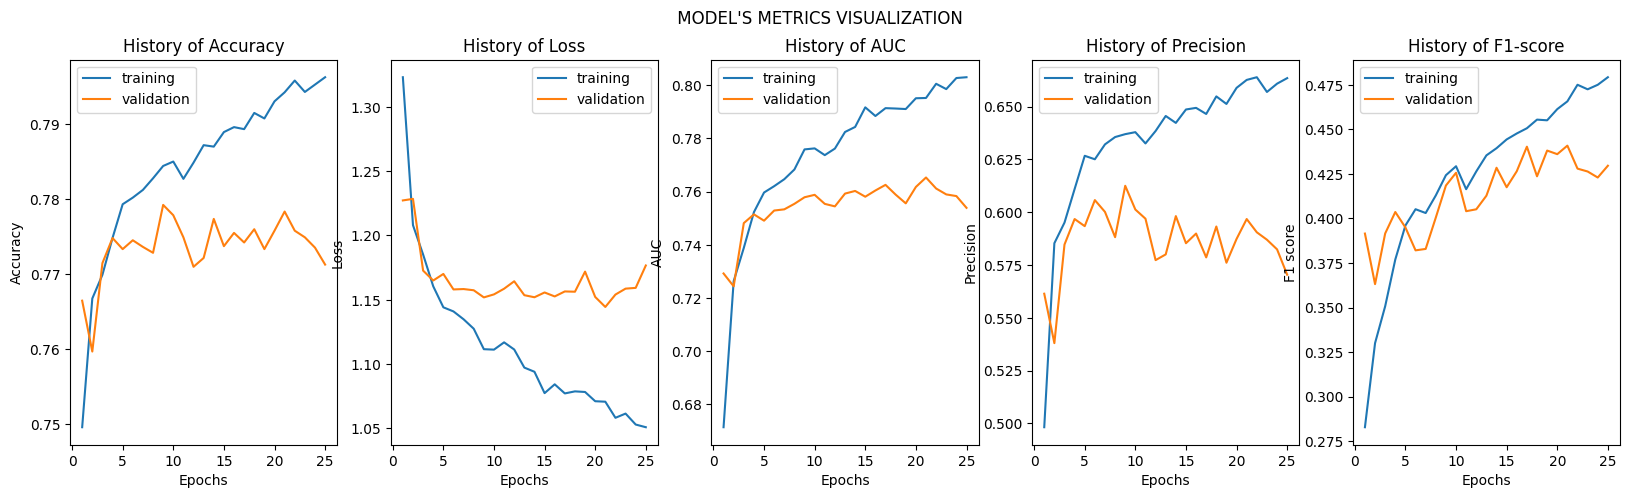

In [18]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [19]:
prediction = model.evaluate(test_dataset)

50/50 [==============================] - 11s 208ms/step - loss: 1.1343 - accuracy: 0.7832 - precision: 0.6084 - recall: 0.3721 - auc: 0.7715 - f1_score: 0.4613


## Results:

### We have used EfficientNet Model For Prediction of Dog Emotion Recognition which is a Multiclass Classification having 4 classes 

#### { Angry , Sad , Happy , Relaxed }

* Accuracy:  0.7817 
* Precision: 0.6033 
* Recall: 0.3708 
* AUC: 0.7731 
* F1 Score: 0.4589